<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

##  InstitutoTecnológico y de Estudios Superiores de Occidente ###
##  Maestría Ciencia de Datos  ###
##  Ingeniería de Características ###
##  Tarea 7 Escalamiento  ###

<br>
<br>

* * *

Estudiante: Daniel Nuño <br>
Profesor: Dr. Carlos Augusto Arellano Muro <br>
Fecha entrega: 24 de abril, 2022 <br>

* * *

<br>
<br>

# Tarea - escalamiento
En el archivo `Escalamiento.xlsx` se encuentran dos variables, las cuales se pretenden analizar para una posterior predicción.

Se entrenará una red neuronal con la variable $x_1$ usando una función de activación sigmoidal unipolar, y la variable $x_2$ se usará para entrenar una red neuronal con una función de activación de tangente hiperbólica.

Use el escalamiento adecuado para cada variable con la finalidad de que la red neuronal opere en el rango de cada función de activación.

Debido a la naturaleza de los datos (por experiencia), se consideran datos extraordinariamente atípicos aquellos que se alejan 13 veces la desviación estándar de la media aritmética.

In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
data = pd.read_excel('Escalamiento.xlsx')
data.head()

,x1,x2
0,6050000.0,5390000.0
1,4720000.0,700000.0
2,4460000.0,10140000.0
3,34740000.0,6600000.0
4,1910000.0,3390000.0


,x1,x2
count,3.287000e+03,3.287000e+03
mean,3.215457e+07,1.457638e+07
std,3.948668e+07,2.910075e+07
min,3.000000e+04,1.040135e+04
25%,6.170000e+06,3.915000e+06
50%,1.612000e+07,7.950000e+06
75%,4.411500e+07,1.552500e+07
max,2.999200e+08,5.490700e+08


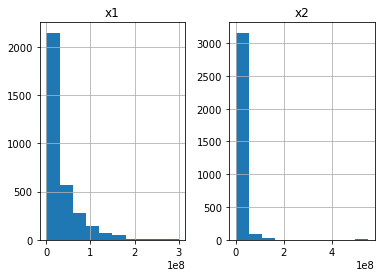

In [47]:
data.hist()
data.describe()

In [48]:
#variable x1, funcion de activacion sigmoidal unipolar [-1, 1]
#normalización basada en la media
X = data.x1
print(X.mean() - 13*X.std(), X.mean() + 13*X.std())
print(sum(X > X.mean() + 13*X.std()))

-481172302.2122417 545481450.3716576
0


No hay atípicos

In [49]:
Ym1 = (X - X.mean()) / (X.max() - X.min())
print(Ym1.describe())
print(Ym1.max(), Ym1.min())

count    3.287000e+03
mean     1.793515e-17
std      1.316706e-01
min     -1.071212e-01
25%     -8.664702e-02
50%     -5.346819e-02
75%      3.988271e-02
max      8.928788e-01
Name: x1, dtype: float64
0.8928788086308048 -0.10712119136919517


In [55]:
#desplazar a 0 y 1
Ym1 = Ym1 - Ym1.min()
Ym1.describe()

count    3287.000000
mean        0.107121
std         0.131671
min         0.000000
25%         0.020474
50%         0.053653
75%         0.147004
max         1.000000
Name: x1, dtype: float64

In [50]:
Xd = X.values.reshape(-1,1)
ss = StandardScaler(with_mean=True,with_std=False) # Unicamente desplazamos
rs = RobustScaler(with_centering=False,with_scaling=True,quantile_range=(0,100)) # Unicamente escalamos usando un rango entre 0 y 100
ss.fit(Xd)
rs.fit(Xd)

# Primero hacemos el desplazamiento
Xd = ss.transform(Xd) # Regresa un arreglo de numpy
# Despues hacemos el escalamiento
Ym1_skl = rs.transform(Xd)

In [52]:
pd.Series(Ym1_skl.reshape(-1)).describe()

count    3.287000e+03
mean     1.793515e-17
std      1.316706e-01
min     -1.071212e-01
25%     -8.664702e-02
50%     -5.346819e-02
75%      3.988271e-02
max      8.928788e-01
dtype: float64

In [57]:
#variable x2, funcion de activacion tangente hiperbólica (-1, 1)
X = data.x2
print(X.mean() - 13*X.std(), X.mean() + 13*X.std())
print(sum(X > X.mean() + 13*X.std()))
X = X[X < X.mean() + 13*X.std()]

-363733327.9235341 392886082.0197267
5


Como tiene atípicos entonces elimino los datos mayores a 13 desviaciones estandar.

In [58]:
minimo=-1
maximo=1
Ym2 = (X - X.min()) / (X.max() - X.min()) * (maximo - minimo) + minimo
Ym2.describe()

count    3282.000000
mean       -0.911177
std         0.136061
min        -1.000000
25%        -0.974871
50%        -0.948918
75%        -0.900702
max         1.000000
Name: x2, dtype: float64

In [64]:
mM = MinMaxScaler(feature_range=(-1,1)) # Escalamiento entre -1 y 1
Ym2_skl = mM.fit_transform(X.values.reshape(-1,1))
Ym2_skl.max(axis=0),Ym2_skl.min(axis=0)

(array([1.]), array([-1.]))

In [68]:
pd.Series(Ym2_skl.reshape(-1)).describe()

count    3282.000000
mean       -0.911177
std         0.136061
min        -1.000000
25%        -0.974871
50%        -0.948918
75%        -0.900702
max         1.000000
dtype: float64